In [116]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

## IMPORT MODEL

In [117]:
source_path = "./model/client_model/best.pt"
model = YOLO(source_path)

## IMPORT VIDEO

In [118]:
video_source_path = ''
cap = cv2.VideoCapture(video_source_path)

## IMPORT PHOTO

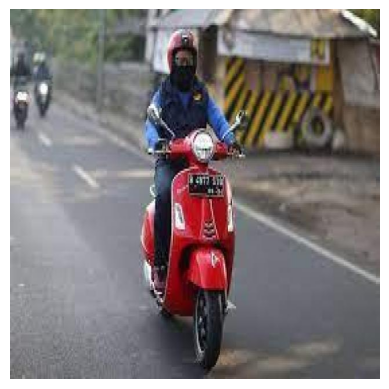

In [129]:
photo_source_path = './dataset/Foto/download_jpg.rf.4634cd910608aa7bb37924e865a4dc88.jpg'
image = cv2.imread(photo_source_path)
img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.axis('off') 
plt.show()

## CLASS MAPPING

In [130]:
class_mapping = {0 : "Mobil", 1 : "Motor", 2 : "Plat Nomor"}

In [131]:
car_box_color = (255, 0, 0)   # Warna merah
motor_box_color = (0, 255, 0)  # Warna hijau
plate_box_color = (0, 0, 255)  # Warna biru

font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 0.8
font_thickness = 2

## PHOTO DETECTION

In [132]:
detections = model(image)[0]


for detection in detections.boxes.data.tolist():
    x1, y1, x2, y2, score, class_id = detection
    if class_id == 0:
        cv2.rectangle(img_rgb, (int(x1), int(y1)), (int(x2), int(y2)), car_box_color, thickness=2)
        cv2.putText(img_rgb, 'Car', (int(x1), int(y1) - 10), font, font_scale, car_box_color, font_thickness)
    elif class_id == 1:
        cv2.rectangle(img_rgb, (int(x1), int(y1)), (int(x2), int(y2)), motor_box_color, thickness=2)
        cv2.putText(img_rgb, 'Motorcycle', (int(x1), int(y1) - 10), font, font_scale, motor_box_color, font_thickness)
    elif class_id == 2:
        cv2.rectangle(img_rgb, (int(x1), int(y1)), (int(x2), int(y2)), plate_box_color, thickness=2)
        cv2.putText(img_rgb, 'License Plate', (int(x1), int(y1) - 10), font, font_scale, plate_box_color, font_thickness)


0: 800x800 1 Motor, 1 Plat Nomor, 229.8ms
Speed: 8.3ms preprocess, 229.8ms inference, 2.7ms postprocess per image at shape (1, 3, 800, 800)


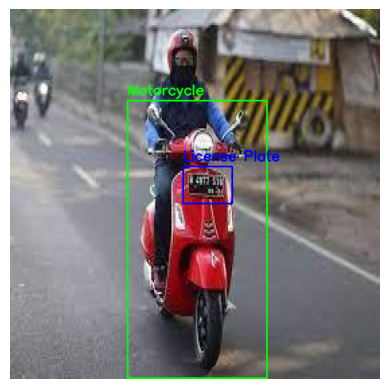

In [133]:
plt.imshow(img_rgb)
plt.axis('off') 
plt.show()